<a href="https://colab.research.google.com/github/AnLiMan/RNN/blob/main/RNN_2_v_0_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение гугл диска

In [1]:
from google.colab import drive
drive.mount('/content/drive')
number_of_interations = 1
print('Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака: ', number_of_interations)

Mounted at /content/drive
Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака:  1


Библиотеки

In [2]:
from pandas import read_csv
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

Keras SimpleRNN
The function below returns a model that includes a SimpleRNN layer and a Dense layer for learning sequential data. The input_shape specifies the parameter (time_steps x features). We’ll simplify everything and use univariate data, i.e., one feature only; the time_steps are discussed below.

In [8]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation = activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

demo_model = create_RNN(5, 1, (6,1), activation=['linear', 'linear'])

In [9]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[-0.76444316 -0.11742139  0.6672487   0.28831458  0.14170933]]  wh =  [[-0.06046879  0.44909358  0.35842323 -0.44975224  0.6811123 ]
 [-0.25835446  0.38064852 -0.5483283  -0.58940345 -0.37456563]
 [-0.8578503  -0.4796846   0.06061804 -0.08627974  0.15125051]
 [ 0.25307256 -0.39983186  0.5142182  -0.60394627 -0.38329795]
 [-0.3600604   0.5132823   0.5502491   0.27951956 -0.4753867 ]]  bh =  [0. 0. 0. 0. 0.]  wy = [[-0.6247449 ]
 [-0.25672746]
 [ 0.02361417]
 [ 0.44204926]
 [-0.3976605 ]] by =  [0.]


In [11]:
x = np.array([1, 2, 3, 4, 5])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 5, 1))
y_pred_model = demo_model.predict(x_input)
 
m = 5
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
h4 = np.dot(x[3], wx) + np.dot(h3,wh) + bh
h5 = np.dot(x[4], wx) + np.dot(h4,wh) + bh
o6 = np.dot(h5, wy) + by
 
print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3, 'h4 = ', h4, 'h5 = ', h5,)
 
print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o6)

h1 =  [[-0.76444316 -0.11742139  0.66724873  0.28831458  0.14170933]] h2 =  [[-2.00278396 -0.98545497  1.39156808  0.79756172 -0.27022637]] h3 =  [[-2.81224518 -2.75192033  2.17003778  1.66924876 -0.53664159]] h4 =  [[-3.42265184 -4.76396237  3.86459163  2.69469455 -0.37433069]] h5 =  [[-4.8829675  -7.06094027  6.13565084  3.72329466 -0.10864462]]
Prediction from network  [[6.697318]]
Prediction from our computation  [[6.69731788]]


In [12]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

dataset_url = 'https://raw.githubusercontent.com/AnLiMan/RNN/main/TestDataset3.csv' 
train_data, test_data, data = get_train_test(dataset_url)

In [13]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [14]:
model = create_RNN(hidden_units=6, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2, shuffle = True)
model.summary()

# Сохраним всю модель в  HDF5 файл
model.save("/content/drive/My Drive/Files for colab/RNN_Model" + str(number_of_interations) + ".h5")

Epoch 1/20
13/13 - 1s - loss: 0.2041
Epoch 2/20
13/13 - 0s - loss: 0.1764
Epoch 3/20
13/13 - 0s - loss: 0.1501
Epoch 4/20
13/13 - 0s - loss: 0.1302
Epoch 5/20
13/13 - 0s - loss: 0.1134
Epoch 6/20
13/13 - 0s - loss: 0.0986
Epoch 7/20
13/13 - 0s - loss: 0.0921
Epoch 8/20
13/13 - 0s - loss: 0.0843
Epoch 9/20
13/13 - 0s - loss: 0.0807
Epoch 10/20
13/13 - 0s - loss: 0.0777
Epoch 11/20
13/13 - 0s - loss: 0.0763
Epoch 12/20
13/13 - 0s - loss: 0.0750
Epoch 13/20
13/13 - 0s - loss: 0.0733
Epoch 14/20
13/13 - 0s - loss: 0.0725
Epoch 15/20
13/13 - 0s - loss: 0.0703
Epoch 16/20
13/13 - 0s - loss: 0.0693
Epoch 17/20
13/13 - 0s - loss: 0.0676
Epoch 18/20
13/13 - 0s - loss: 0.0668
Epoch 19/20
13/13 - 0s - loss: 0.0653
Epoch 20/20
13/13 - 0s - loss: 0.0637
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 6)                 48        
_____________________________

In [15]:
# Восстановим в точности ту же модель, включая веса и оптимизатор

Loading_model = keras.models.load_model("/content/drive/My Drive/Files for colab/RNN_Model" + str(number_of_interations) + ".h5")
Loading_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 6)                 48        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [16]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.249 RMSE
Test RMSE: 0.141 RMSE


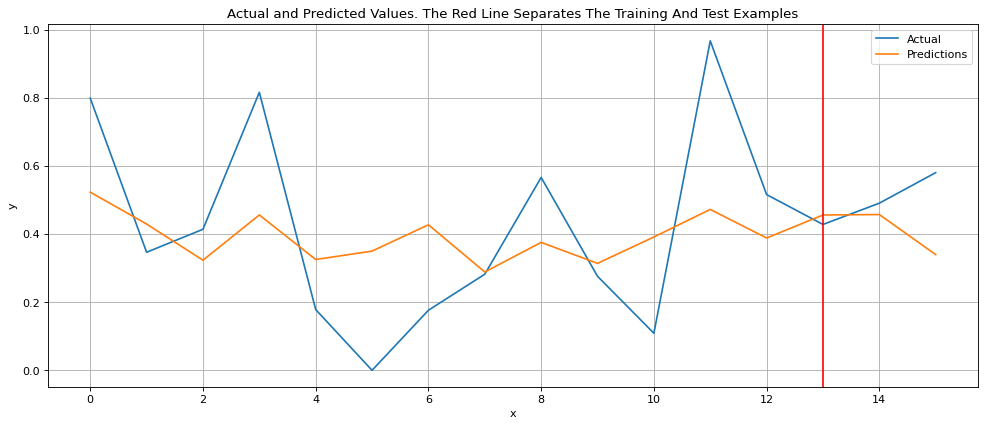

In [17]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
    plt.grid()
plot_result(trainY, testY, train_predict, test_predict)